In [110]:
# CSV file path
file_path = './height-weight.csv'

# import pandas to work with the dataset
import pandas as pd

In [111]:
# read the csv file and peek into it
ds = pd.read_csv(file_path)
ds.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [112]:
# convert the inches and pounds to ft and kg
ds['Height'] = ds['Height(Inches)'].map(lambda inches: round(inches * 0.0833333, 2))
ds['Weight'] = ds['Weight(Pounds)'].map(lambda pounds: round(pounds * 0.453592, 1))
ds.head()

,Index,Height(Inches),Weight(Pounds),Height,Weight
0,1,65.78331,112.9925,5.48,51.3
1,2,71.51521,136.4873,5.96,61.9
2,3,69.39874,153.0269,5.78,69.4
3,4,68.21660,142.3354,5.68,64.6
4,5,67.78781,144.2971,5.65,65.5


In [113]:
# get rid of the Height(Inches), Weight(Pounds) columns
ds = ds.drop(ds.columns[1:3], axis=1)
ds.head()

,Index,Height,Weight
0,1,5.48,51.3
1,2,5.96,61.9
2,3,5.78,69.4
3,4,5.68,64.6
4,5,5.65,65.5


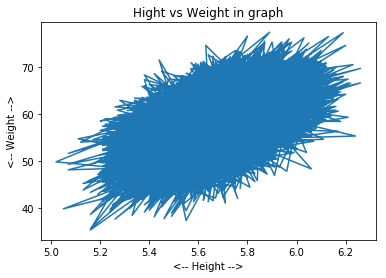

In [114]:
# matplotlib is used for visualizing the data in graphs, pie charts, bar charts, scatter plots
import matplotlib.pyplot as plt

# Using graph
plt.plot(ds['Height'], ds['Weight'])
plt.xlabel('<-- Height -->')
plt.ylabel('<-- Weight -->')
plt.title('Hight vs Weight in graph')
plt.show()


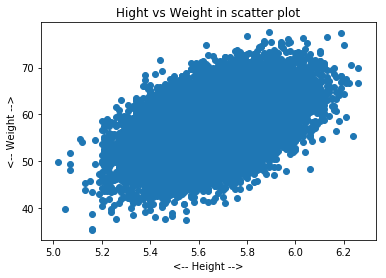

In [115]:
# Using scatter plot
plt.scatter(ds['Height'], ds['Weight'])
plt.xlabel('<-- Height -->')
plt.ylabel('<-- Weight -->')
plt.title('Hight vs Weight in scatter plot')
plt.show()

In [116]:
# Scipy is one of the package to provide few ML algo
from scipy import stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(ds['Height'], ds['Weight'])

# slope, intercept, rvalue, pvalue, stderr are the attributes of the Lin regression model

Signature: stats.linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.
    If only x is given (and y=None), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.

Returns
-------
slope : float
    slope of the regression line
intercept : float
    intercept of the regression line
rvalue : float
    correlation coefficient
pvalue : float
    two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.

In [117]:
# create the Liner function out of it
# st line equation: y = mx + c
def predict(height):
    return slope * height + intercept

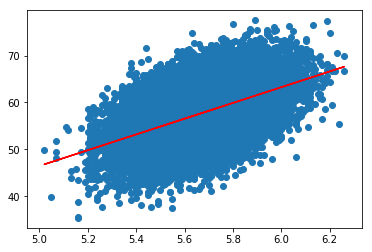

In [118]:
plt.scatter(ds['Height'], ds['Weight'])
plt.plot(ds['Height'], predict(ds['Height']), 'r') # plot x vs y and change the line color
plt.show()

In [119]:
print('% Accuracy', round(rvalue ** 2 * 100, 2))
print('pvalue', pvalue)
print('stderr', stderr)

% Accuracy 25.29
pvalue 0.0
stderr 0.18247227714574074
